In [22]:
import numpy as np
from scipy.stats import ttest_1samp,ttest_ind,wilcoxon,mannwhitneyu,levene,shapiro
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt

In [4]:

#daily intake of Sugar in Miligrams for 11 diabetic man
daily_intake=np.array([5560,5770,7640,5180,5690,6435,6803,7869,6876,8213,8765])

In [5]:
t_statistic,p_value= ttest_1samp(daily_intake,7600)


In [6]:
print(t_statistic,p_value)

-2.2185358562915685 0.05082047790158664


In [9]:
#hence p<0.05 rejecting null hypothesis and accepting alternate hypothesis
z_statistic,p_value=wilcoxon(daily_intake-7600)

In [10]:
print(z_statistic,p_value)

12.5 0.06821657316330874


In [11]:
#p>0.04 hence it follows a normal distribution
#power of test
(np.mean(daily_intake)-7600)/np.std(daily_intake)

-0.7015626376633353

In [14]:
    print(ttest_power(-0.725,nobs=11,alpha=0.05, alternative='two-sided'))

0.5835176733152669


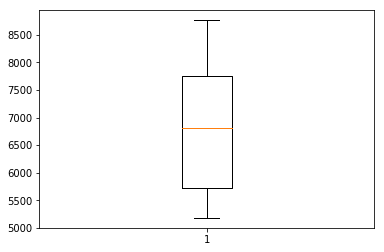

In [17]:
plt.boxplot(daily_intake)
plt.show()

In [18]:
#Two sample ttest
weight=np.array([#sugar consumption in grams and stature(0=diabetic,1=non diabetic)
[9.31,0],
[7.76,0],
[6.98,1],
[7.88,1],
[8.49,1],
[10.05,1],
[8.80,1],
[10.88,1],
[6.13,1],
[7.90,1],
[11.51,0],
[12.59,0],
[7.05,1],
[11.85,0],
[9.99,0],
[7.48,0],
[8.79,0],
[8.69,1],
[9.68,0],
[8.58,1],
[9.19,0],
[8.11,1]])


In [19]:
#pre and post exercise food energy intake
intake=np.array([[5460,3980],[5230,4890],[5640,3885],[6180,5160],[6390,5645],[6512,4650],[6765,6109],[7515,5975],[7515,6790],
                 [8230,6970],[8770,7335]])

In [24]:
group1=weight[:,1]==0
group1=weight[group1][:,0]

In [29]:
group2=weight[:,1]==1
group2=weight[group2][:,0]

In [32]:
group1

array([ 9.31,  7.76, 11.51, 12.59, 11.85,  9.99,  7.48,  8.79,  9.68,
        9.19])

In [33]:
group2


array([ 6.98,  7.88,  8.49, 10.05,  8.8 , 10.88,  6.13,  7.9 ,  7.05,
        8.69,  8.58,  8.11])

In [34]:
t_statistic,p_value==ttest_ind(group1,group2)
print(t_statistic,p_value)

-2.2185358562915685 0.06821657316330874


In [36]:
u,p_value=mannwhitneyu(group1,group2)

In [37]:
print(u,p_value)

29.0 0.022156896141583025


In [38]:
pre=intake[:,0]
post=intake[:,1]

In [39]:
#paired ttest and parameteric in nature
t_statistic,p_value=ttest_1samp(post-pre,0)
print(t_statistic,p_value)

-7.750633257827653 1.552189414812135e-05


In [41]:
z_statistic,p_value=wilcoxon(post-pre)

In [42]:
print(z_statistic,p_value)

0.0 0.0033456181158508813


In [43]:
levene(pre,post)

LeveneResult(statistic=0.05508687920155723, pvalue=0.8168231592315234)

In [44]:
shapiro(post)

(0.9546877145767212, 0.7041629552841187)

In [45]:
shapiro(pre)

(0.9533762335777283, 0.6872939467430115)

In [48]:
#power of test
#for two sample pooled delta value instead of a single deviation for single sample test
(np.mean(pre)-np.mean(post))/np.sqrt(((11-1)*np.var(pre)+(11-1)*np.var(post))/11+11-2)

0.7797048526975643

In [51]:
print(ttest_power(0.79,nobs=11,alpha=0.05,alternative="two-sided"))

0.6568678541496535


In [ ]:
#Chi-square-test -test to find goodnes of fit for categorical variables
